#### Linear Regression

In linear regression models, the target value is modeled as a linear combination of the features. The model is trained on a dataset with known target values. The model can then be used to predict the target value for new data points.

The linear regression model is defined as:

$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

where $y$ is the target value, $x_1$ to $x_n$ are the feature values, and $w_0$ to $w_n$ are the model parameters. The model parameters are learned during the training process using the least squares method.

The linear regression model can be extended to include non-linear features by using a non-linear transformation of the features. For example, the model can be extended to include quadratic features as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2$$

The linear regression model can also be extended to include interaction features as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2$$

The linear regression model can be extended to include polynomial features and interaction features at the same time as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 + w_5x_1x_2$$

We will now extend the linear regression model to include multiple features.  For the data, we will use a dataset that contains information about effect of various forms of advertising media on product sales. We read the data from a CSV file into a Pandas DataFrame.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
advert = pd.read_csv('advertising.csv')
print(advert.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


The first step is to look at the data.  A reasonable first step is to plot sales vs. each of the features, individually.

Text(0, 0.5, 'Sales')

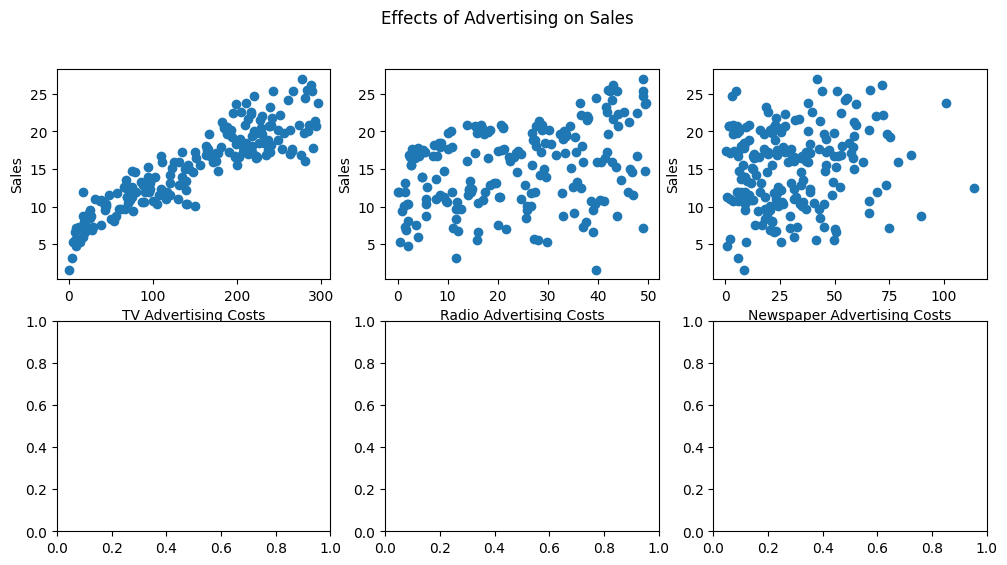

In [3]:
# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(2, 3, figsize=(12,6))
fig.suptitle("Effects of Advertising on Sales")
ax[0][0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][0].set_xlabel('TV Advertising Costs')
ax[0][0].set_ylabel('Sales')

ax[0][1].plot(advert['Radio'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][1].set_xlabel('Radio Advertising Costs')
ax[0][1].set_ylabel('Sales')

ax[0][2].plot(advert['Newspaper'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][2].set_xlabel('Newspaper Advertising Costs')
ax[0][2].set_ylabel('Sales')

### Initial Observations

It would appear that the strongest dependence is on TV Advertising Costs.  There is a weaker dependence on Radio Advertising Costs.  There is no obvious dependence on Newspaper Advertising Costs.

We will now fit a linear regression model to the data.  We will use the Statsmodels package to fit the model.  The Statsmodels package is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.  The Statsmodels package is built on top of the NumPy and SciPy packages.

Once we have completed the fit, we can calculate a new column in the DataFrame that contains the predicted values.  We can then plot the predicted values against the actual values to see how well the model fits the data.

Finally, we can calculate a second new column which contains the residuals - the difference between the actual values and the predicted values.

      TV  Radio  Newspaper  Sales   Sales_TV  Sales_TV_Residual
0  230.1   37.8       69.2   22.1  19.737265           2.362735
1   44.5   39.3       45.1   10.4   9.443004           0.956996
2   17.2   45.9       69.3   12.0   7.928816           4.071184
3  151.5   41.3       58.5   16.5  15.377734           1.122266
4  180.8   10.8       58.4   17.9  17.002852           0.897148


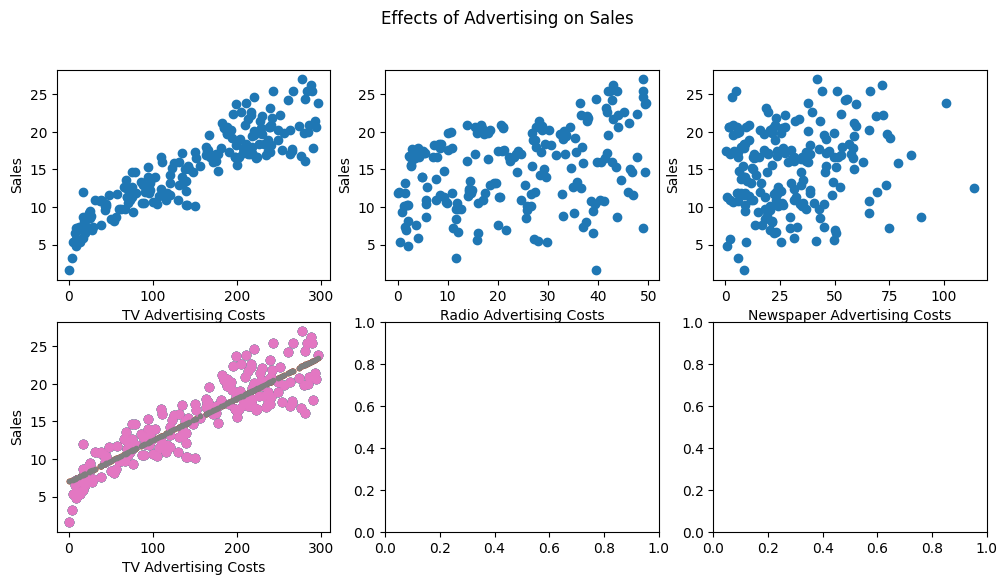

In [7]:
# Fit a linear regression model to a single parameter - Sales vs. TV advertising costs
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()

# View model summary
# print(model.summary())

# Predict values
sales_pred = model.predict()

# Add this prediction to the DataFrame
advert['Sales_TV'] = sales_pred
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
advert['Sales_TV_Residual'] = advert['Sales'] - sales_pred
print(advert.head())

# Plot regression against actual data
ax[1][0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][0].plot(advert['TV'], sales_pred, '.', linewidth=2, label = "Prediction")   # regression line
ax[1][0].set_xlabel('TV Advertising Costs')
ax[1][0].set_ylabel('Sales')

fig

We can now continue with the same process for the other two features.  First, we fit a linear regression model to the residual data from the previous step.  Then, we calculate the predicted values and the residuals.  Finally, we plot the predicted values against the actual values to see how well the model fits the data.

      TV  Radio  Newspaper  Sales   Sales_TV  Sales_TV_Residual  \
0  230.1   37.8       69.2   22.1  19.737265           2.362735   
1   44.5   39.3       45.1   10.4   9.443004           0.956996   
2   17.2   45.9       69.3   12.0   7.928816           4.071184   
3  151.5   41.3       58.5   16.5  15.377734           1.122266   
4  180.8   10.8       58.4   17.9  17.002852           0.897148   

   Sales_TV_Radio  Sales_TV_Radio_Residual  
0        1.553210                 0.809525  
1        1.713489                -0.756492  
2        2.418716                 1.652469  
3        1.927194                -0.804928  
4       -1.331811                 2.228959  


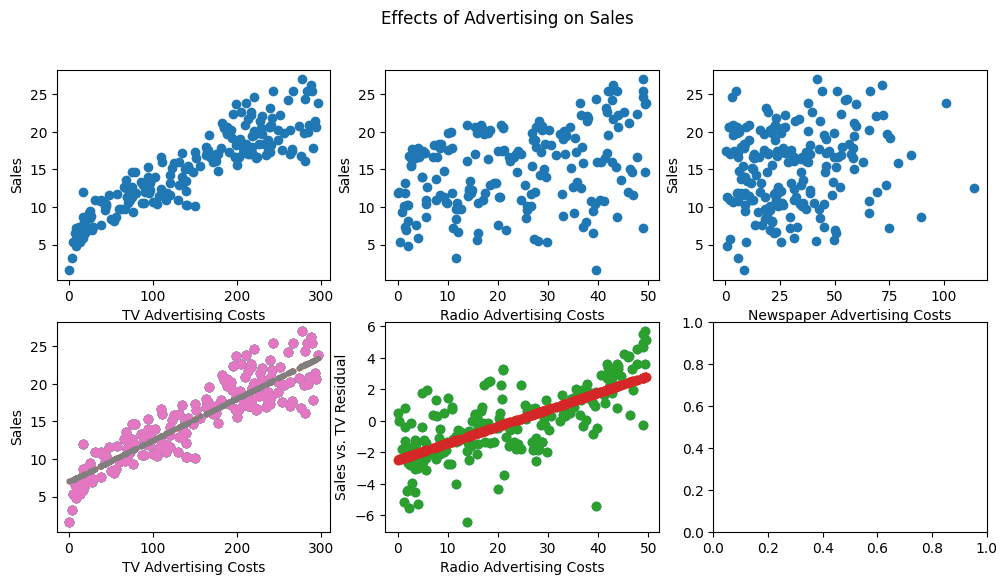

In [9]:
# Fit a linear regression model to a single parameter - Sales_TV_Residual vs. Radio advertising costs
model2 = smf.ols('Sales_TV_Residual ~ Radio', data=advert)
model2 = model2.fit()
sales_pred2 = model2.predict()
advert['Sales_TV_Radio'] = sales_pred2
advert['Sales_TV_Radio_Residual'] = advert['Sales_TV_Residual'] - sales_pred2
print(advert.head())

ax[1][1].plot(advert['Radio'], advert['Sales_TV_Residual'], 'o', label = "Data")  # scatter plot showing actual data
ax[1][1].plot(advert['Radio'], sales_pred2, 'o', label = "Data")  # scatter plot showing actual data
ax[1][1].set_xlabel('Radio Advertising Costs')
ax[1][1].set_ylabel('Sales vs. TV Residual')

fig

      TV  Radio  Newspaper  Sales   Sales_TV  Sales_TV_Residual  \
0  230.1   37.8       69.2   22.1  19.737265           2.362735   
1   44.5   39.3       45.1   10.4   9.443004           0.956996   
2   17.2   45.9       69.3   12.0   7.928816           4.071184   
3  151.5   41.3       58.5   16.5  15.377734           1.122266   
4  180.8   10.8       58.4   17.9  17.002852           0.897148   

   Sales_TV_Radio  Sales_TV_Radio_Residual  Sales_TV_Radio_Newspaper  \
0        1.553210                 0.809525                  0.005564   
1        1.713489                -0.756492                  0.002094   
2        2.418716                 1.652469                  0.005579   
3        1.927194                -0.804928                  0.004024   
4       -1.331811                 2.228959                  0.004009   

   Sales_TV_Radio_Newspaper_Residual  
0                           0.803961  
1                          -0.758587  
2                           1.646890  
3       

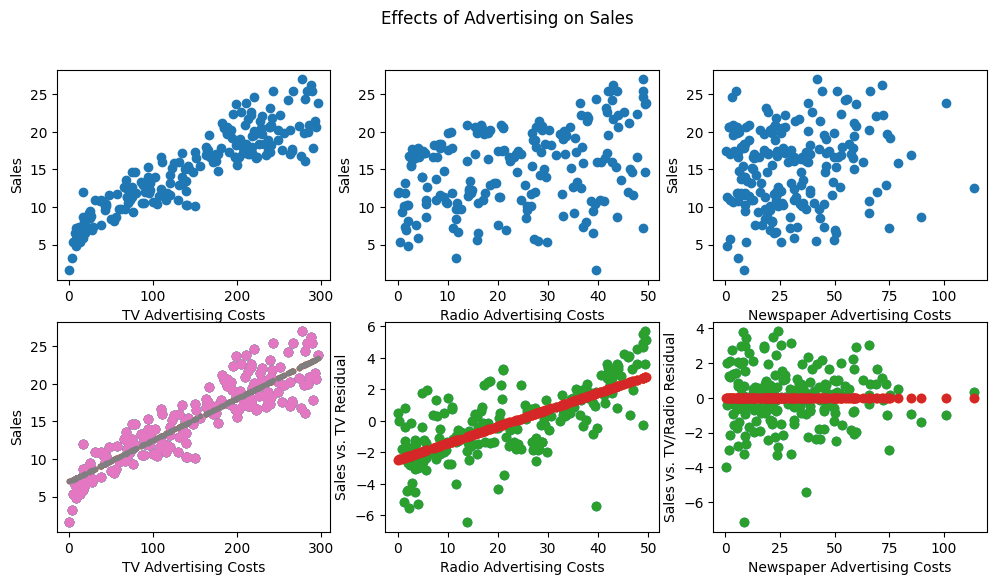

In [11]:
# Fit a linear regression model to a single parameter - Sales_TV_Radio_Residual vs. Newspaper advertising costs
model3 = smf.ols('Sales_TV_Radio_Residual ~ Newspaper', data=advert)
model3 = model3.fit()
sales_pred3 = model3.predict()
advert['Sales_TV_Radio_Newspaper'] = sales_pred3
advert['Sales_TV_Radio_Newspaper_Residual'] = advert['Sales_TV_Radio_Residual'] - sales_pred3
print(advert.head())

ax[1][2].plot(advert['Newspaper'], advert['Sales_TV_Radio_Residual'], 'o', label = "Data")  # scatter plot showing actual data
ax[1][2].plot(advert['Newspaper'], sales_pred3, 'o', label = "Data")  # scatter plot showing actual data
ax[1][2].set_xlabel('Newspaper Advertising Costs')
ax[1][2].set_ylabel('Sales vs. TV/Radio Residual')

fig

In [12]:
print(model.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           7.93e-74
Time:                        17:53:29   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.0